<a href="https://colab.research.google.com/github/TruongQuocHau110802/AI-subject/blob/main/nhan_dien_gao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
%cd /content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_gao

/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_gao


In [6]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [7]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_gao/Train',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 270 images belonging to 9 classes.


In [8]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_gao/Validation',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 135 images belonging to 9 classes.


In [28]:
# Các nhãn có trong bộ dữ liệu training set
dict = training_set.class_indices
dict

{'Gạo Arborio': 0,
 'Gạo Jasmine': 1,
 'Gạo ST25': 2,
 'Gạo lứt': 3,
 'Gạo nếp': 4,
 'Gạo tấm': 5,
 'Gạo tím than': 6,
 'Gạo vàng': 7,
 'Gạo đen': 8}

In [22]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Gạo Arborio': 0,
 'Gạo Jasmine': 1,
 'Gạo ST25': 2,
 'Gạo lứt': 3,
 'Gạo nếp': 4,
 'Gạo tấm': 5,
 'Gạo tím than': 6,
 'Gạo vàng': 7,
 'Gạo đen': 8}

In [13]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(100,100,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 9 tín hiệu ra
model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

In [15]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
9/9 [==============================] - 4s 397ms/step - loss: 0.2683 - accuracy: 0.8741 - val_loss: 0.2725 - val_accuracy: 0.8593
Epoch 2/100
9/9 [==============================] - 3s 331ms/step - loss: 0.2260 - accuracy: 0.8926 - val_loss: 0.2745 - val_accuracy: 0.8963
Epoch 3/100
9/9 [==============================] - 3s 390ms/step - loss: 0.1727 - accuracy: 0.9259 - val_loss: 0.1596 - val_accuracy: 0.9037
Epoch 4/100
9/9 [==============================] - 3s 365ms/step - loss: 0.2413 - accuracy: 0.9259 - val_loss: 0.1631 - val_accuracy: 0.9259
Epoch 5/100
9/9 [==============================] - 3s 320ms/step - loss: 0.2165 - accuracy: 0.9111 - val_loss: 0.1888 - val_accuracy: 0.9185
Epoch 6/100
9/9 [==============================] - 3s 355ms/step - loss: 0.1868 - accuracy: 0.9185 - val_loss: 0.1483 - val_accuracy: 0.9333
Epoch 7/100
9/9 [==============================] - 3s 331ms/step - loss: 0.2249 - accuracy: 0.9037 - val_loss: 0.1412 - val_accuracy: 0.9333
Epoch 8/100
9

In [16]:
# Lưu lại
model.save("nhan_dien_gao.h5")

In [17]:
# Tải mô hình 
model_CNN=load_model('nhan_dien_gao.h5')

In [18]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose = 0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.04854621738195419
Train Accuracy 0.9851852059364319


<function matplotlib.pyplot.show(*args, **kw)>

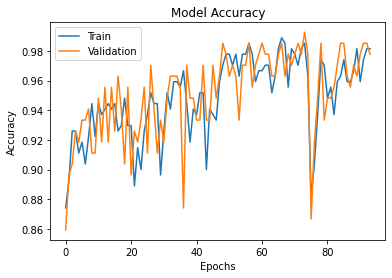

In [19]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F36F7C96590>
1/1 [==============================] - 0s 17ms/step
Đây là: Gạo lứt
Chu thich: Dữ liệu nằm trong Test1


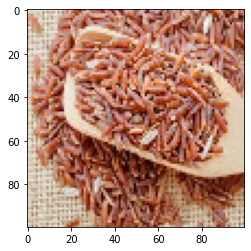

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F365808C7D0>
1/1 [==============================] - 0s 18ms/step
Đây là: Gạo ST25
Chu thich: Dữ liệu nằm trong Test1


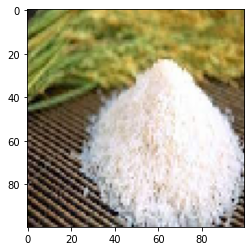

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F365821FE50>
1/1 [==============================] - 0s 23ms/step
Đây là: Gạo tấm
Chu thich: Dữ liệu nằm trong Test1


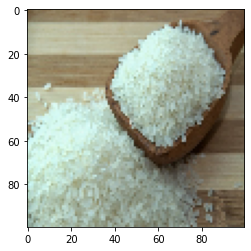

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F36584DDF50>
1/1 [==============================] - 0s 18ms/step
Đây là: Gạo tím than
Chu thich: Dữ liệu nằm trong Test1


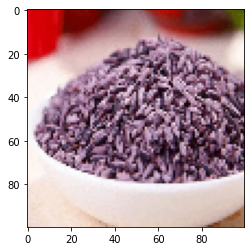

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F36F7F4DD50>
1/1 [==============================] - 0s 21ms/step
Đây là: Gạo Jasmine
Chu thich: Dữ liệu nằm trong Test1


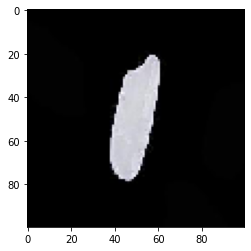

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F365850A210>
1/1 [==============================] - 0s 18ms/step
Đây là: Gạo vàng
Chu thich: Dữ liệu nằm trong Test1


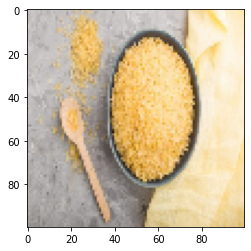

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F3658354F10>
1/1 [==============================] - 0s 18ms/step
Đây là: Gạo đen
Chu thich: Dữ liệu nằm trong Test1


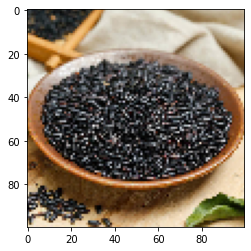

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F365837C950>
1/1 [==============================] - 0s 22ms/step
Đây là: Gạo Arborio
Chu thich: Dữ liệu nằm trong Test1


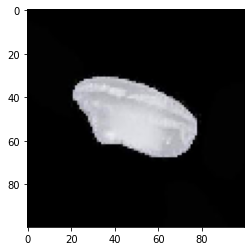

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F3658104F10>
1/1 [==============================] - 0s 16ms/step
Đây là: Gạo nếp
Chu thich: Dữ liệu nằm trong Test1


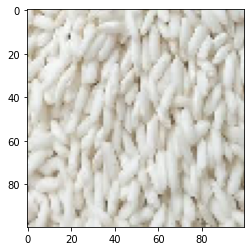

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F365820B850>
1/1 [==============================] - 0s 23ms/step
Đây là: Gạo Arborio
Chu thich: Dữ liệu nằm trong Test2


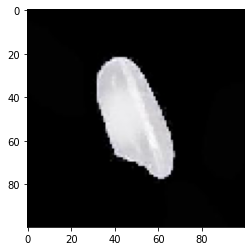

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F3657F86610>
1/1 [==============================] - 0s 18ms/step
Đây là: Gạo lứt
Chu thich: Dữ liệu nằm trong Test2


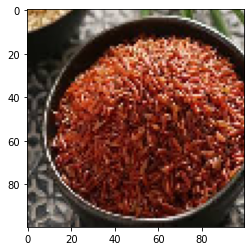

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F36F7F12210>
1/1 [==============================] - 0s 27ms/step
Đây là: Gạo đen
Chu thich: Dữ liệu nằm trong Test2


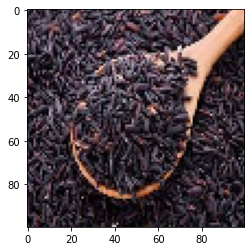

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F36581C11D0>
1/1 [==============================] - 0s 18ms/step
Đây là: Gạo ST25
Chu thich: Dữ liệu nằm trong Test2


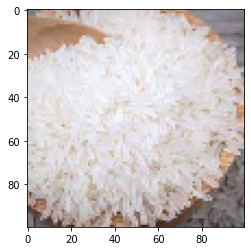

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F3657E53890>
1/1 [==============================] - 0s 18ms/step
Đây là: Gạo tím than
Chu thich: Dữ liệu nằm trong Test2


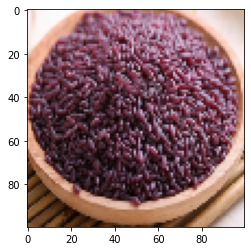

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F36583C0850>
1/1 [==============================] - 0s 19ms/step
Đây là: Gạo nếp
Chu thich: Dữ liệu nằm trong Test2


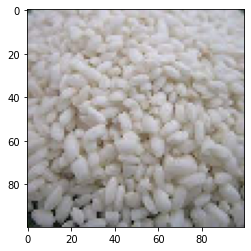

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F365831AE50>
1/1 [==============================] - 0s 31ms/step
Đây là: Gạo Jasmine
Chu thich: Dữ liệu nằm trong Test2


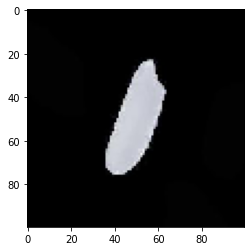

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F371C020F90>
1/1 [==============================] - 0s 18ms/step
Đây là: Gạo tấm
Chu thich: Dữ liệu nằm trong Test2


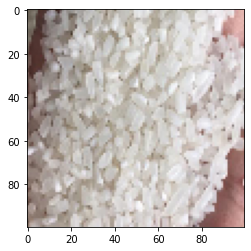

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F377007C850>
1/1 [==============================] - 0s 18ms/step
Đây là: Gạo vàng
Chu thich: Dữ liệu nằm trong Test2


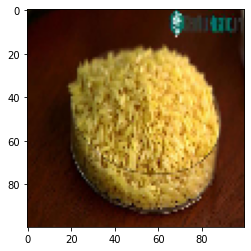

In [36]:
test1="/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_gao/Test/Test1"
test2="/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_gao/Test/Test2"
test = [test1, test2]
stt = 0
for j in test:
  stt += 1
  for i in os.listdir(j):
    img=load_img(j+'/'+i,target_size=(100,100))
    print(img)
    plt.imshow(img)
    img=img_to_array(img)
    img=img.astype('float32')
    img=img/255
    img=np.expand_dims(img,axis=0)
    result=model_CNN.predict(img)
    for key in dict:
      value = dict.get(key)
      if round(result[0][value])==1:
        prediction = key
    print('Đây là:',prediction)
    print(f'Chu thich: Dữ liệu nằm trong Test{stt}')
    plt.show()